## 1. Import data

In [41]:
import pandas as pd
data = pd.read_csv("data.csv")
# print(data.values.shape)
X = data.values[:, 0:11]
y = data.values[:, 11]

data.head(10)

,Month,Day,Hour,Temp,RH,Solar,Wind,Week,Holiday,Semester,PreElec,Elec
0,1,1,1,6.087026,83.6923,0.0000,2.071852,1,1,0,20.87,24.87
1,1,1,2,5.583258,83.0189,0.0000,1.864067,1,1,0,24.87,26.13
2,1,1,3,5.352995,83.9231,0.0000,2.011680,1,1,0,26.13,27.25
3,1,1,4,5.257898,83.9808,0.0000,1.831165,1,1,0,27.25,28.25
4,1,1,5,5.181759,84.1509,0.0000,1.433881,1,1,0,28.25,26.25
5,1,1,6,5.047243,84.5490,0.0000,1.586545,1,1,0,26.25,27.88
6,1,1,7,4.590112,84.7500,1.3462,1.779577,1,1,0,27.88,23.87
7,1,1,8,4.327391,84.1509,32.4717,1.897819,1,1,0,23.87,21.12
8,1,1,9,4.773804,82.0196,130.8235,1.428785,1,1,0,21.12,23.62
9,1,1,10,6.139924,75.8824,288.7647,1.849539,1,1,0,23.62,20.75


## 2. plot the given data

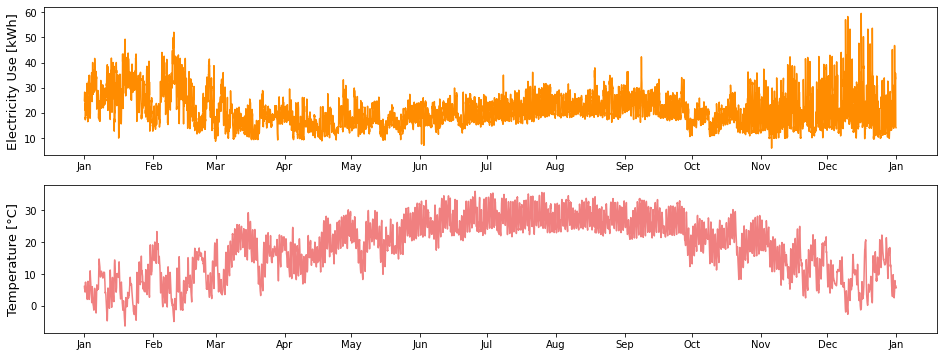

In [43]:
import matplotlib.pyplot as plt
import matplotlib.dates as mdates

x_data = pd.date_range('2018-01-01', periods=8759, freq='H') 

fig, ax = plt.subplots(2)
fig.set_figheight(6)
fig.set_figwidth(16)

ax[0].plot(x_data, data["Elec"], color="darkorange")
ax[0].set_ylabel("Electricity Use [kWh]", fontsize =13)
ax[0].xaxis.set_major_locator(mdates.MonthLocator())
ax[0].xaxis.set_major_formatter(mdates.DateFormatter('%b'))

ax[1].plot(x_data, data["Temp"], color="lightcoral")
ax[1].set_ylabel("Temperature [°C]", fontsize =13)
ax[1].xaxis.set_major_locator(mdates.MonthLocator())
ax[1].xaxis.set_major_formatter(mdates.DateFormatter('%b'))

plt.show()

## plot the feature data

Text(0, 0.5, 'Percentage [%]')

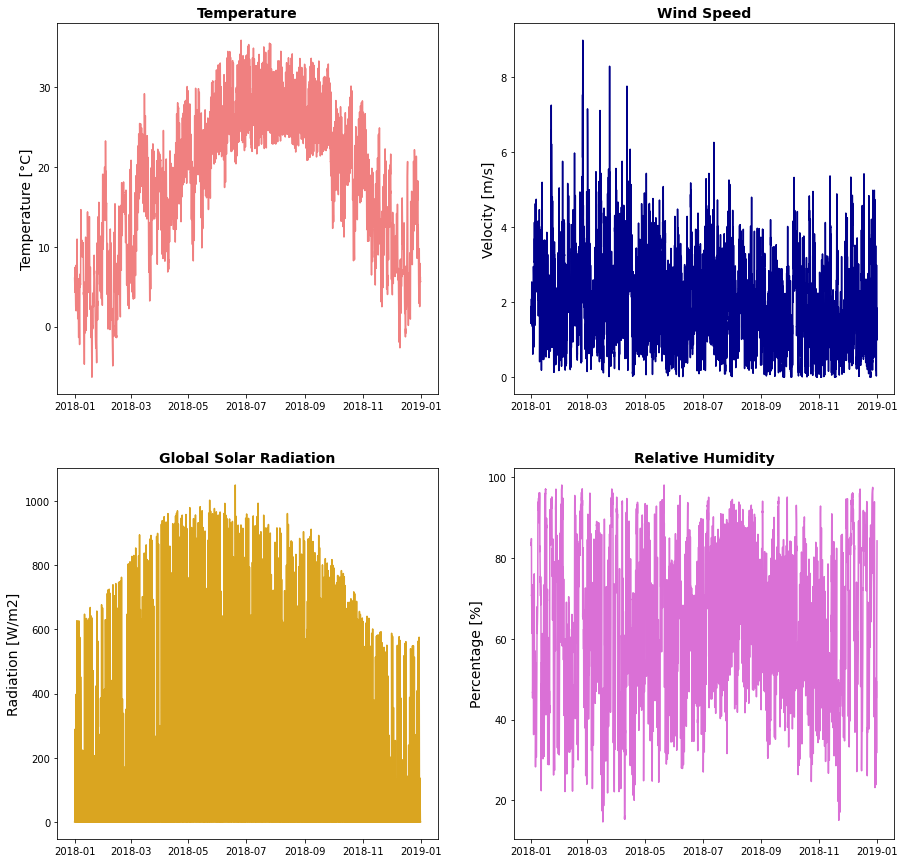

In [46]:
# plot the given data
x_data = pd.date_range('2018-01-01', periods=8759, freq='H') 

fig,a =  plt.subplots(2,2)
fig.set_figheight(15)
fig.set_figwidth(15)

a[0][0].plot(x_data, data["Temp"], color="lightcoral")
a[0][0].set_title('Temperature', fontsize=14, fontweight='bold')
a[0][0].set_ylabel("Temperature [°C]", fontsize=14)

a[1][0].plot(x_data, data["Solar"], color="goldenrod")
a[1][0].set_title('Global Solar Radiation', fontsize=14, fontweight='bold')
a[1][0].set_ylabel("Radiation [W/m2]", fontsize=14)

a[0][1].plot(x_data, data["Wind"], color="darkblue")
a[0][1].set_title('Wind Speed', fontsize=14, fontweight='bold')
a[0][1].set_ylabel("Velocity [m/s]", fontsize=14)

a[1][1].plot(x_data, data["RH"], color="orchid")
a[1][1].set_title('Relative Humidity', fontsize=14, fontweight='bold')
a[1][1].set_ylabel("Percentage [%]", fontsize=14)

## 3. Box-Whisker Plot

Text(0, 0.5, 'Temperature [°C]')

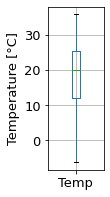

In [48]:
boxplot = data.boxplot(column=['Temp'], grid=True, fontsize=13,figsize=(1,3))
boxplot.set_ylabel('Temperature [°C]', fontsize=13)

Text(0, 0.5, 'Radiation [W/m2]')

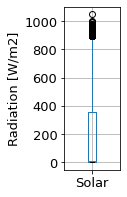

In [49]:
boxplot = data.boxplot(column=['Solar'], grid=True, fontsize=13,figsize=(1,3))
boxplot.set_ylabel('Radiation [W/m2]', fontsize=13)

Text(0, 0.5, 'Percentage [%]')

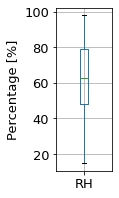

In [50]:
boxplot = data.boxplot(column=['RH'], grid=True, fontsize=13,figsize=(1,3))
boxplot.set_ylabel('Percentage [%]', fontsize=13)

Text(0, 0.5, 'Velocity [m/s]')

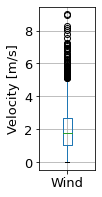

In [52]:
boxplot = data.boxplot(column=['Wind'], grid=True, fontsize=13,figsize=(1,3))
boxplot.set_ylabel('Velocity [m/s]', fontsize=13)

## 4. Pearson Correlation

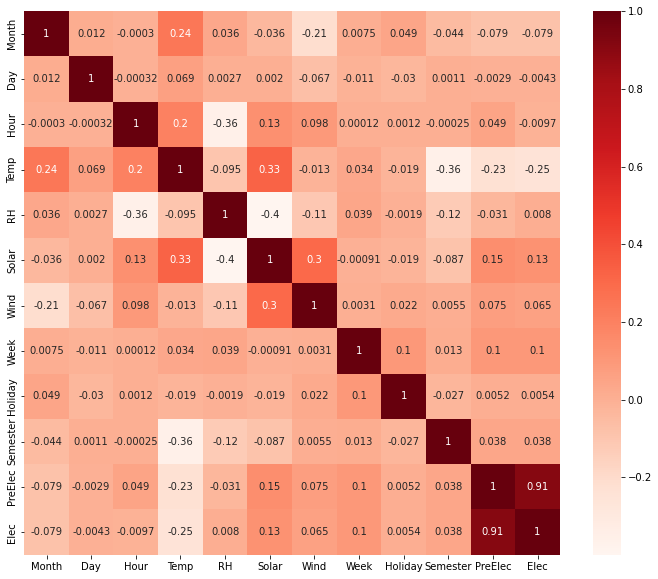

In [53]:
# Feature correlations
import seaborn as sns

plt.figure(figsize=(12,10))
cor = data.corr()
sns.heatmap(cor, annot=True, cmap=plt.cm.Reds)
plt.show()

## 5. Building Supervised ML Models

In [55]:
from sklearn.model_selection import cross_val_score
import time
import numpy as np

## 5.1 Decision Tree Regression

In [56]:
from sklearn.tree import DecisionTreeRegressor
startTime = time.time()
DCR    = DecisionTreeRegressor(random_state=0)
scores_DT = cross_val_score(DCR, X, y, cv=10, scoring='neg_mean_squared_error')
executionTime_DT = (time.time() - startTime)
# print(f"scores:\n{scores}")
print("%0.2f accuracy with a standard deviation of %0.2f" % (-scores_DT.mean(), scores_DT.std()))
print(f'Execution time in seconds: {executionTime_DT}')

14.32 accuracy with a standard deviation of 11.71
Execution time in seconds: 0.6287989616394043


## 5.2 Linear Regression

In [57]:
from sklearn import linear_model
startTime = time.time()
LR = linear_model.LinearRegression()

scores_LR = cross_val_score(LR, X, y, cv=10, scoring='neg_mean_squared_error')
executionTime_LR = (time.time() - startTime)
# print(f"scores:\n{scores}")
print("%0.2f accuracy with a standard deviation of %0.2f" % (-scores_LR.mean(), scores_LR.std()))
print(f'Execution time in seconds: {executionTime_LR}')

7.89 accuracy with a standard deviation of 7.30
Execution time in seconds: 0.05843830108642578


## 5.3 Neural Network

In [58]:
from sklearn.neural_network import MLPRegressor
startTime = time.time()
nn = MLPRegressor(solver='adam', alpha=1e-3,
                  hidden_layer_sizes=(5, 5), max_iter=1000,
                  random_state=1)

scores_NN = cross_val_score(nn, X, y, cv=10, scoring='neg_mean_squared_error')
executionTime_NN = (time.time() - startTime)
# print(f"scores:\n{scores}")
print("%0.2f accuracy with a standard deviation of %0.2f" % (-scores_NN.mean(), scores_NN.std()))
print(f'Execution time in seconds: {executionTime_NN}')

7.84 accuracy with a standard deviation of 7.34
Execution time in seconds: 19.46000862121582


## 5.4 Random Foerest

In [59]:
from sklearn.ensemble import RandomForestRegressor
startTime = time.time()
regr = RandomForestRegressor(random_state=0)

scores_RF = cross_val_score(regr, X, y, cv=10, scoring='neg_mean_squared_error')
executionTime_RF = (time.time() - startTime)
# print(f"scores:\n{scores}")
print("%0.2f accuracy with a standard deviation of %0.2f" % (-scores_RF.mean(), scores_RF.std()))
print(f'Execution time in seconds: {executionTime_RF}')

7.44 accuracy with a standard deviation of 7.19
Execution time in seconds: 40.997886657714844


## 6. plot the results

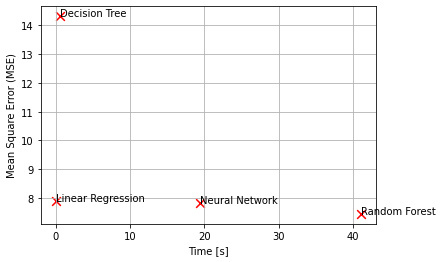

In [60]:
order = ["Decision Tree", "Linear Regression", "Neural Network", "Random Forest"]
MSE = [-scores_DT.mean(), -scores_LR.mean(), -scores_NN.mean(), -scores_RF.mean()]
time = [executionTime_DT, executionTime_LR, executionTime_NN, executionTime_RF]

fig, ax = plt.subplots()
ax.scatter(time, MSE, marker="x",s=75, color='r')

for i, txt in enumerate(order):
    ax.annotate(txt, (time[i], MSE[i]))
plt.grid()

plt.xlabel("Time [s]")
plt.ylabel("Mean Square Error (MSE)")

plt.show()